# Assignment 6: Apply NB

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [279]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=100000)
data['project_is_approved'].value_counts()

1    84817
0    15183
Name: project_is_approved, dtype: int64

In [334]:
#Storing all the features in this list after vectorization
all_features=[]

In [281]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [282]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [283]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [284]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [285]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)


In [286]:

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit happens only on train data
#print("length =",len(vectorizer.get_feature_names()))
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(44890, 8) (44890,)
(22110, 8) (22110,)
(33000, 8) (33000,)
After vectorizations
(44890, 5000) (44890,)
(22110, 5000) (22110,)
(33000, 5000) (33000,)


In [287]:
for cnt in vectorizer.get_feature_names():
    all_features.append(cnt)
print(len(all_features))

5000


In [288]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)


In [289]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit happens only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After TF-IDF vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


After TF-IDF vectorizations
(44890, 5000) (44890,)
(22110, 5000) (22110,)
(33000, 5000) (33000,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [290]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().


## 1.4.1 One Hot Encoding on school state(Vectorization)

In [291]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(44890, 51) (44890,)
(22110, 51) (22110,)
(33000, 51) (33000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [292]:
for cnt in vectorizer.get_feature_names():
    all_features.append(cnt)
print(len(all_features))

5051


## 1.4.2 One Hot Encoding on teacher prefix(Vectorization)

In [293]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(44890, 5) (44890,)
(22110, 5) (22110,)
(33000, 5) (33000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [294]:
for cnt in vectorizer.get_feature_names():
    all_features.append(cnt)
print(len(all_features))

5056


## 1.4.3 One Hot Encoding on project grade category(Vectorization)

In [295]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(44890, 4) (44890,)
(22110, 4) (22110,)
(33000, 4) (33000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [296]:
for cnt in vectorizer.get_feature_names():
    all_features.append(cnt)
print(len(all_features))

5060


## 1.4.4 One Hot Encoding on clean categories(Vectorization)

In [297]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(44890, 9) (44890,)
(22110, 9) (22110,)
(33000, 9) (33000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [298]:
for cnt in vectorizer.get_feature_names():
    all_features.append(cnt)
print(len(all_features))

5069


## 1.4.5 One Hot Encoding on clean sub-categories(Vectorization)

In [299]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(44890, 30) (44890,)
(22110, 30) (22110,)
(33000, 30) (33000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [300]:
for cnt in vectorizer.get_feature_names():
    all_features.append(cnt)
print(len(all_features))

5099


## 1.4.6 Encoding Numericals Feature:Price

In [301]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 1) (44890,)
(22110, 1) (22110,)
(33000, 1) (33000,)


In [302]:
all_features.append('price')
print(len(all_features))

5100


## 1.4.7 Encoding Numericals Feature:teacher_number_of_previously_posted_projects

In [303]:
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_teacher_number_norm.shape, y_train.shape)
print(X_cv_teacher_number_norm.shape, y_cv.shape)
print(X_test_teacher_number_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(44890, 1) (44890,)
(22110, 1) (22110,)
(33000, 1) (33000,)


In [304]:
all_features.append('teacher_number_of_previously_posted_projects')
print(len(all_features))

5101


## Final Dataset Using BOW

In [305]:
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_categories_ohe, X_train_subcategories_ohe, X_train_price_norm,X_train_teacher_number_norm)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_price_norm,X_cv_teacher_number_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_categories_ohe, X_test_subcategories_ohe, X_test_price_norm, X_test_teacher_number_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(44890, 5101) (44890,)
(22110, 5101) (22110,)
(33000, 5101) (33000,)


## Final Dataset Using tfidf

In [306]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_categories_ohe, X_train_subcategories_ohe, X_train_price_norm,X_train_teacher_number_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_price_norm,X_cv_teacher_number_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_categories_ohe, X_test_subcategories_ohe, X_test_price_norm, X_test_teacher_number_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(44890, 5101) (44890,)
(22110, 5101) (22110,)
(33000, 5101) (33000,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [307]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot


In [308]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [309]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import math

train_auc=[]
cv_auc=[]
log_alphas=[]

alphas= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in tqdm(alphas):
    nb=MultinomialNB(alpha=i, class_prior=[0.5,0.5])
    nb.fit(X_tr_bow, y_train)
    y_train_pred=batch_predict(nb, X_tr_bow)
    y_cv_pred=batch_predict(nb, X_cr_bow)
    
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
    j=math.log(i)
    log_alphas.append(j)



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.72it/s]


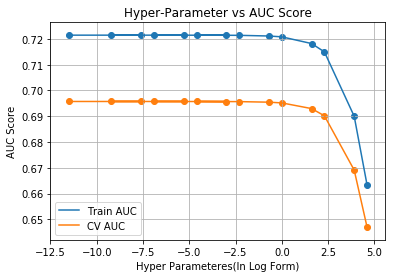

In [310]:
import matplotlib.pyplot as plt

#plt.plot(alphas,train_auc,label="Train AUC")
#plt.plot(alphas,cv_auc,label="CV AUC")

plt.plot(log_alphas,train_auc,label="Train AUC")
plt.plot(log_alphas,cv_auc,label="CV AUC")

#plt.scatter(alphas,train_auc)
#plt.scatter(alphas,cv_auc)

plt.scatter(log_alphas,train_auc)
plt.scatter(log_alphas,cv_auc)

plt.grid()
plt.legend()
plt.xlabel("Hyper Parameteres(In Log Form)")
plt.ylabel("AUC Score")
plt.title("Hyper-Parameter vs AUC Score")
plt.show()

In [311]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [312]:
import numpy as np
import pandas as pd
from scipy.sparse import vstack
from sklearn.metrics import roc_curve, auc
#print(X_tr_bow.shape)
#print(X_cr_bow.shape)
all_Xtrain_bow = vstack((X_tr_bow, X_cr_bow))
print(all_Xtrain_bow.shape)

#print(y_train.shape)
#print(y_cv.shape)
all_Ytrain_bow=np.hstack((y_train, y_cv))
print(all_Ytrain_bow.shape)


(67000, 5101)
(67000,)


In [313]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.


Train AUC- 0.6580572932375696
Test AUC- 0.6416274097036366


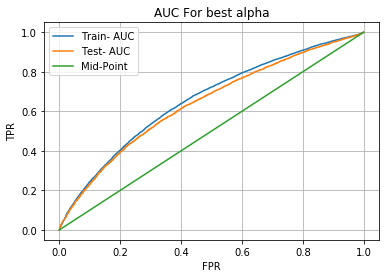

(18016,)
(18016,)
(18016,)


In [314]:
best_alpha=1

nb_bow=MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
nb_bow.fit(all_Xtrain_bow,all_Ytrain_bow)

y_train_pred=batch_predict(nb, all_Xtrain_bow)
y_te_pred=batch_predict(nb, X_te_bow)

train_fpr, train_tpr, train_threshold= roc_curve(all_Ytrain_bow,y_train_pred)
test_fpr, test_tpr, test_threshold= roc_curve(y_test,y_te_pred)   
print("Train AUC-",auc(train_fpr,train_tpr))
print("Test AUC-",auc(test_fpr, test_tpr))
plt.plot(train_fpr, train_tpr,label="Train- AUC")
plt.plot(test_fpr, test_tpr,label="Test- AUC")
plt.plot([0,1],[0,1],label="Mid-Point")
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC For best alpha")
plt.show()
print(train_threshold.shape)
print(train_fpr.shape)
print(train_tpr.shape)

In [315]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


In [316]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [317]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(train_threshold, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(all_Ytrain_bow, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_te_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.38508795635841325 for threshold 1.0
Train confusion matrix
[[ 6470  3703]
 [22419 34408]]
Test confusion matrix
[[ 3054  1956]
 [11075 16915]]


#### Set 2

In [318]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot



In [319]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [320]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import math

train_auc=[]
cv_auc=[]
log_alphas=[]

alphas= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in tqdm(alphas):
    nb=MultinomialNB(alpha=i, class_prior=[0.5,0.5])
    nb.fit(X_tr_tfidf, y_train)
    y_train_pred=batch_predict(nb, X_tr_tfidf)
    y_cv_pred=batch_predict(nb, X_cr_tfidf)
    
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
    j=math.log(i)
    log_alphas.append(j)



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  3.51it/s]


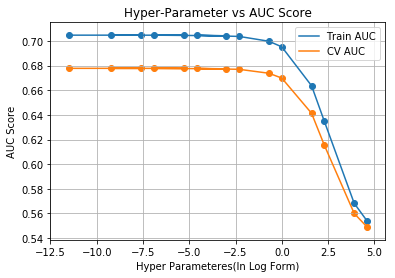

In [321]:
import matplotlib.pyplot as plt

#plt.plot(alphas,train_auc,label="Train AUC")
#plt.plot(alphas,cv_auc,label="CV AUC")

plt.plot(log_alphas,train_auc,label="Train AUC")
plt.plot(log_alphas,cv_auc,label="CV AUC")

#plt.scatter(alphas,train_auc)
#plt.scatter(alphas,cv_auc)

plt.scatter(log_alphas,train_auc)
plt.scatter(log_alphas,cv_auc)

plt.grid()
plt.legend()
plt.xlabel("Hyper Parameteres(In Log Form)")
plt.ylabel("AUC Score")
plt.title("Hyper-Parameter vs AUC Score")
plt.show()

In [322]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [323]:
import numpy as np
import pandas as pd
from scipy.sparse import vstack
from sklearn.metrics import roc_curve
#print(X_tr_bow.shape)
#print(X_cr_bow.shape)
all_Xtrain_tfidf = vstack((X_tr_tfidf, X_cr_tfidf))
print(all_Xtrain_tfidf.shape)

#print(y_train.shape)
#print(y_cv.shape)
all_Ytrain_tfidf=np.hstack((y_train, y_cv))
print(all_Ytrain_tfidf.shape)

(67000, 5101)
(67000,)


In [324]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.


Train AUC- 0.5523566821068906
Test AUC- 0.543082406105973


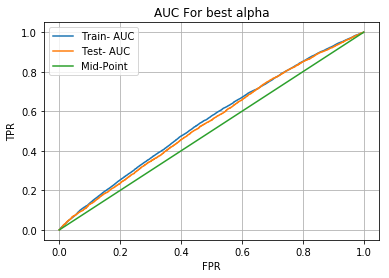

(17492,)
(17492,)
(17492,)


In [325]:
best_alpha=0.01

nb_tfidf=MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
nb_tfidf.fit(all_Xtrain_tfidf,all_Ytrain_tfidf)

y_train_pred=batch_predict(nb, all_Xtrain_tfidf)
y_te_pred=batch_predict(nb, X_te_tfidf)

train_fpr, train_tpr, train_threshold= roc_curve(all_Ytrain_tfidf,y_train_pred)
test_fpr, test_tpr, test_threshold= roc_curve(y_test,y_te_pred)   
print("Train AUC-",auc(train_fpr,train_tpr))
print("Test AUC-",auc(test_fpr, test_tpr))
plt.plot(train_fpr, train_tpr,label="Train- AUC")
plt.plot(test_fpr, test_tpr,label="Test- AUC")
plt.plot([0,1],[0,1],label="Mid-Point")
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC For best alpha")
plt.show()
print(train_threshold.shape)
print(train_fpr.shape)
print(train_tpr.shape)

In [326]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


In [327]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [328]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(train_threshold, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(all_Ytrain_bow, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_te_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.2906373442785059 for threshold 1.0
Train confusion matrix
[[ 5472  4701]
 [26122 30705]]
Test confusion matrix
[[ 2615  2395]
 [12973 15017]]


In [329]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)

In [330]:
if(len(all_features)==all_Xtrain_bow.shape[1]):
    print("Total Features=",len(all_features))
    print(nb_bow.feature_log_prob_[1, :].argsort()[::-1])
    print("Top 20 Positive Features in set 1 are:")
    for i in nb_bow.feature_log_prob_[1, :].argsort()[::-1][:20]:
        print(all_features[i],end=", ")
    print("Top 20 Negative Features in set 1 are:")
    for i in nb_bow.feature_log_prob_[0, :].argsort()[::-1][:20]:
        print(all_features[i],end=", ")

Total Features= 5101
[3998 3583 2770 ... 5046 5050 5051]
Top 20 Positive Features in set 1 are:
students, school, my, learning, classroom, the, not, they, my students, learn, help, price, many, nannan, we, work, need, reading, use, teacher_number_of_previously_posted_projects, Top 20 Negative Features in set 1 are:
students, school, learning, my, classroom, not, learn, they, the, help, my students, price, nannan, many, we, need, work, come, teacher_number_of_previously_posted_projects, reading, 

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [331]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

## Observations->
1. In set 1 and set 2 there is only one difference which is vectorization of essay feature. In set 1 it is sone via BOW while in set 2 it is done by tf-idf. Both are having 5000 features.
2. In set 1 when hyper parameter tuning is done on alpha AUC starts to diverge very shaply as the value of log(alpha) increases from 0 i.e. alpha=1. So I choose alpha=1 as the best value of alpha amongst the all.
3. In set 2 when hyper parameter tuning is done on alpha AUC starts to diverge very shaply as the value of log(alpha) increases from -2.5 i.e. alpha=0.01. So I choose alpha=0.01 as the best value of alpha amongst the all.
4. In set 1 on best alpha=1 we get train_auc_score=0.63 and test_auc_score on 0.62
5. In set 2 on best alpha=0.01 we get train_auc_score=0.53 and test_auc_score on 0.54
6. I have used log-alphas in plotting of alpha vs AUC Score since it is hard to plot the large range of alpha on any axis.
7. It is an unbalanced dataset where no of positive points are greater than the number of negative points
8. No of positive data points are 84% while number of negative points are only 16%. So it is necessary to use class_prior in Naive Bayes algo accordingly.
9. Some of the top features are same in positive class and negative class. And few of them are same but their ordering is different.
10. NB is faster than KNN and also is highly interpretable.

In [332]:
from prettytable import PrettyTable

In [333]:
x=PrettyTable()
x.field_names=['Vectorizer', 'Model', 'Alpha', 'Train AUC', 'Test AUC']
x.add_row(['BOW','Naive Bayes',1,0.63,0.62])
x.add_row(['Tf-Idf','Naive Bayes',0.01,0.53,0.54])
print(x)

+------------+-------------+-------+-----------+----------+
| Vectorizer |    Model    | Alpha | Train AUC | Test AUC |
+------------+-------------+-------+-----------+----------+
|    BOW     | Naive Bayes |   1   |    0.63   |   0.62   |
|   Tf-Idf   | Naive Bayes |  0.01 |    0.53   |   0.54   |
+------------+-------------+-------+-----------+----------+
